In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#### The attributes are:

1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline

#### In this project, we build a complete KNN Classification model using the Wine dataset and enhance it using Cross-Validation. We apply Standard Scaling, 10-Fold CV, evaluate accuracy stability, tune hyperparameters with GridSearchCV, and visualize accuracy across different k-values. This project covers distance metrics, weighting methods, and selecting the optimal KNN configuration for highest accuracy.”

In [74]:
data = pd.read_csv('Wine dataset.csv')

In [75]:
data.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [77]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [78]:
data.isnull().sum()

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [39]:
data[["class"]].value_counts() #Slighly imbalanced data

class
2        71
1        59
3        48
Name: count, dtype: int64

In [79]:
data.columns

Index(['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline '],
      dtype='object')

<Axes: xlabel='class', ylabel='count'>

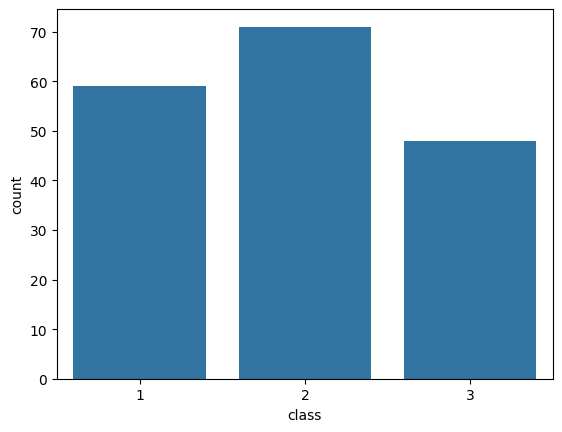

In [80]:
sns.countplot(x="class",data=data)

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

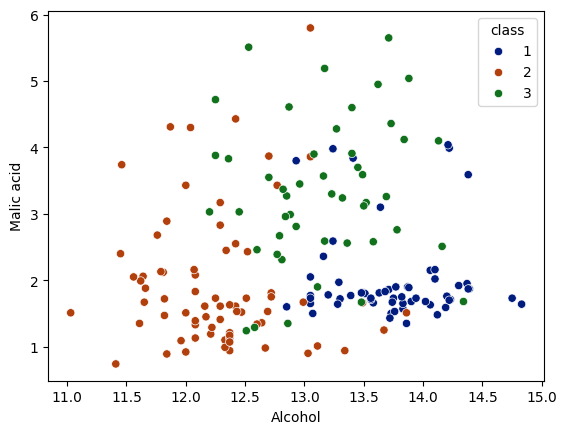

In [81]:
sns.scatterplot(x='Alcohol',y="Malic acid", hue="class",data=data, palette="dark")

<Axes: xlabel='Alcohol', ylabel='Ash'>

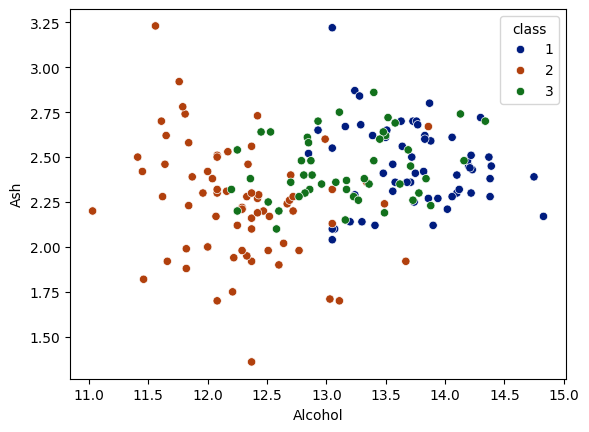

In [43]:
sns.scatterplot(x='Alcohol',y="Ash", hue="class",data=data, palette="dark")

<Axes: xlabel='Alcohol', ylabel='Alcalinity of ash'>

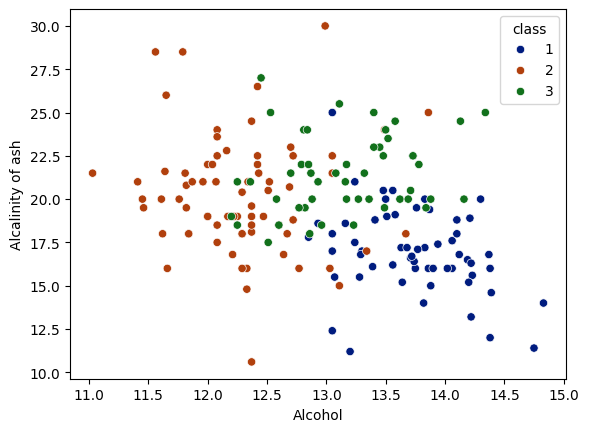

In [44]:
sns.scatterplot(x='Alcohol',y="Alcalinity of ash", hue="class",data=data, palette="dark")

<Axes: xlabel='Alcohol', ylabel='Magnesium'>

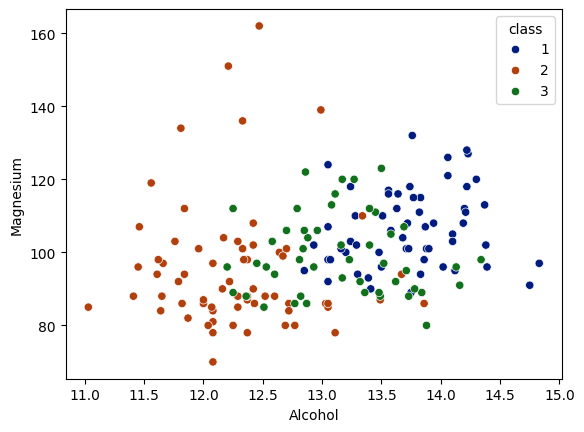

In [45]:
sns.scatterplot(x='Alcohol',y="Magnesium", hue="class",data=data, palette="dark")

<Axes: xlabel='Alcohol', ylabel='Total phenols'>

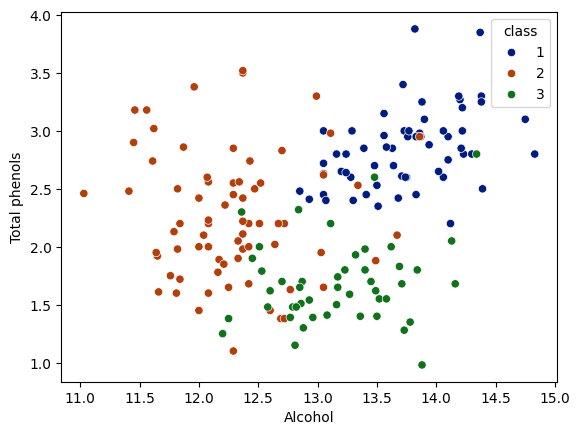

In [46]:
sns.scatterplot(x='Alcohol',y="Total phenols", hue="class",data=data, palette="dark")

<Axes: xlabel='Alcohol', ylabel='Flavanoids'>

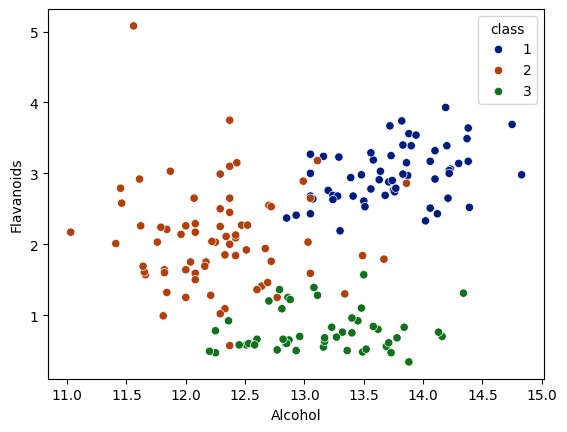

In [47]:
sns.scatterplot(x='Alcohol',y="Flavanoids", hue="class",data=data, palette="dark")

<Axes: xlabel='Alcohol', ylabel='Nonflavanoid phenols'>

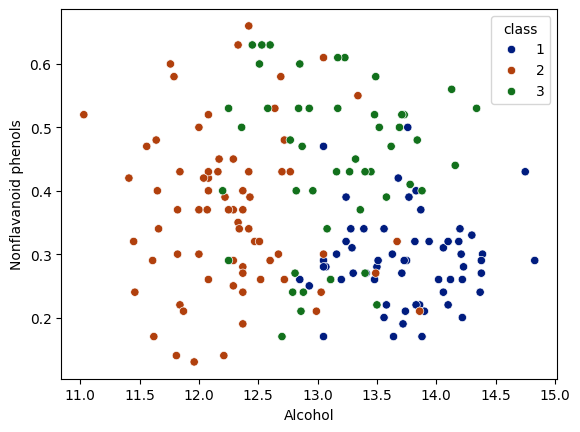

In [48]:
sns.scatterplot(x='Alcohol',y="Nonflavanoid phenols", hue="class",data=data, palette="dark")

<Axes: xlabel='Alcohol', ylabel='Proanthocyanins'>

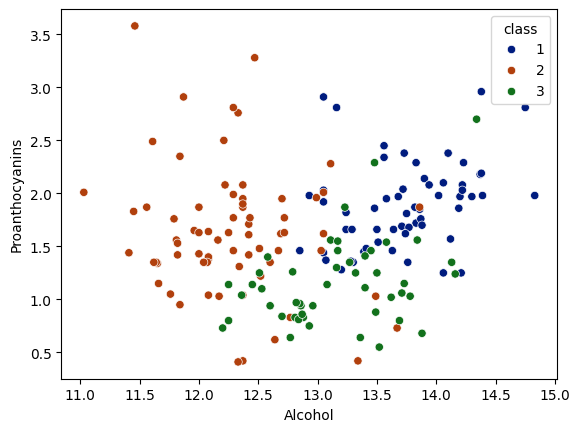

In [49]:
sns.scatterplot(x='Alcohol',y="Proanthocyanins", hue="class",data=data, palette="dark")

<Axes: xlabel='Alcohol', ylabel='Color intensity'>

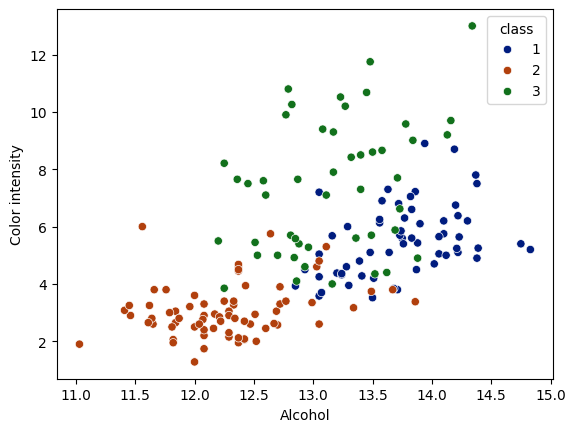

In [50]:
sns.scatterplot(x='Alcohol',y="Color intensity", hue="class",data=data, palette="dark")

<Axes: xlabel='Alcohol', ylabel='Hue'>

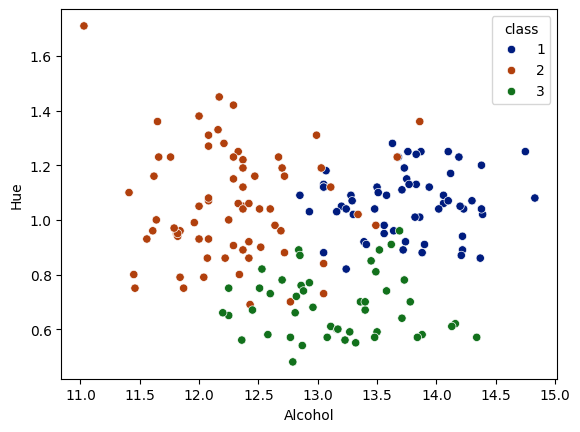

In [51]:
sns.scatterplot(x='Alcohol',y="Hue", hue="class",data=data, palette="dark")

<Axes: xlabel='Alcohol', ylabel='OD280/OD315 of diluted wines'>

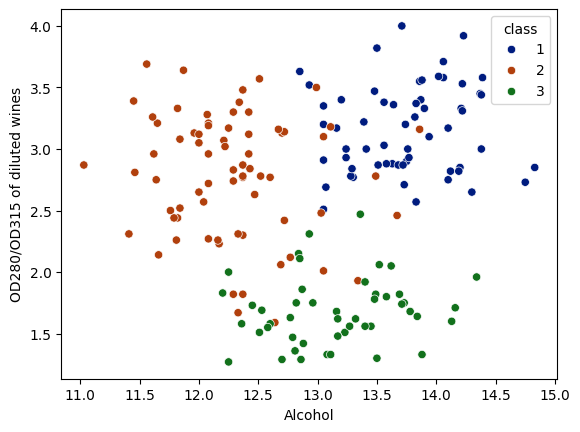

In [52]:
sns.scatterplot(x='Alcohol',y="OD280/OD315 of diluted wines", hue="class",data=data, palette="dark")

<Axes: xlabel='Alcohol', ylabel='Proline '>

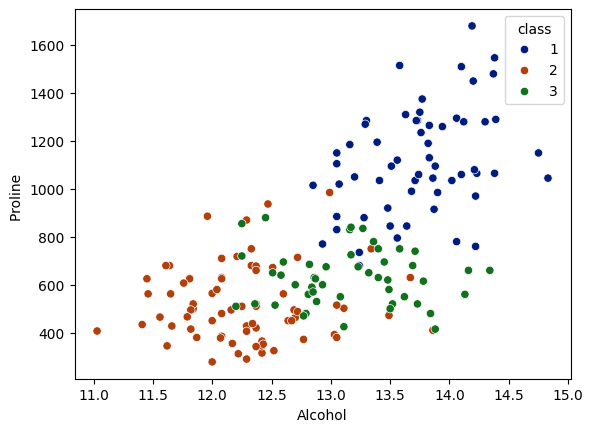

In [53]:
sns.scatterplot(x='Alcohol',y="Proline ", hue="class",data=data, palette="dark")

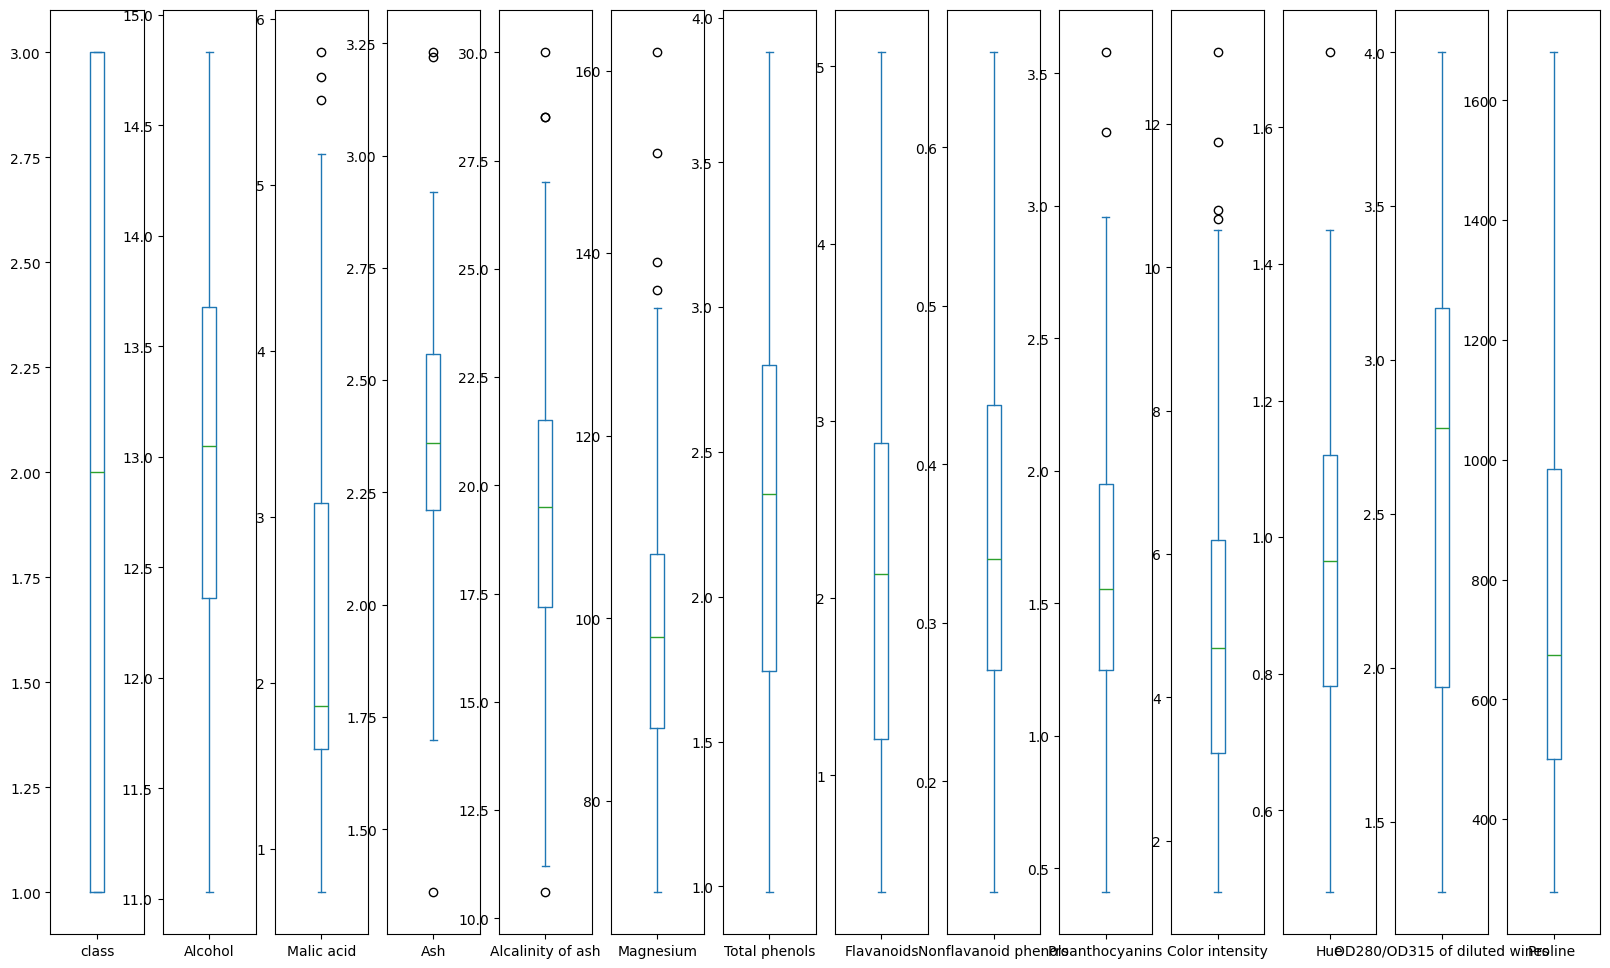

In [54]:
data.plot(kind="box",subplots=True,figsize=(20,12))
plt.show()

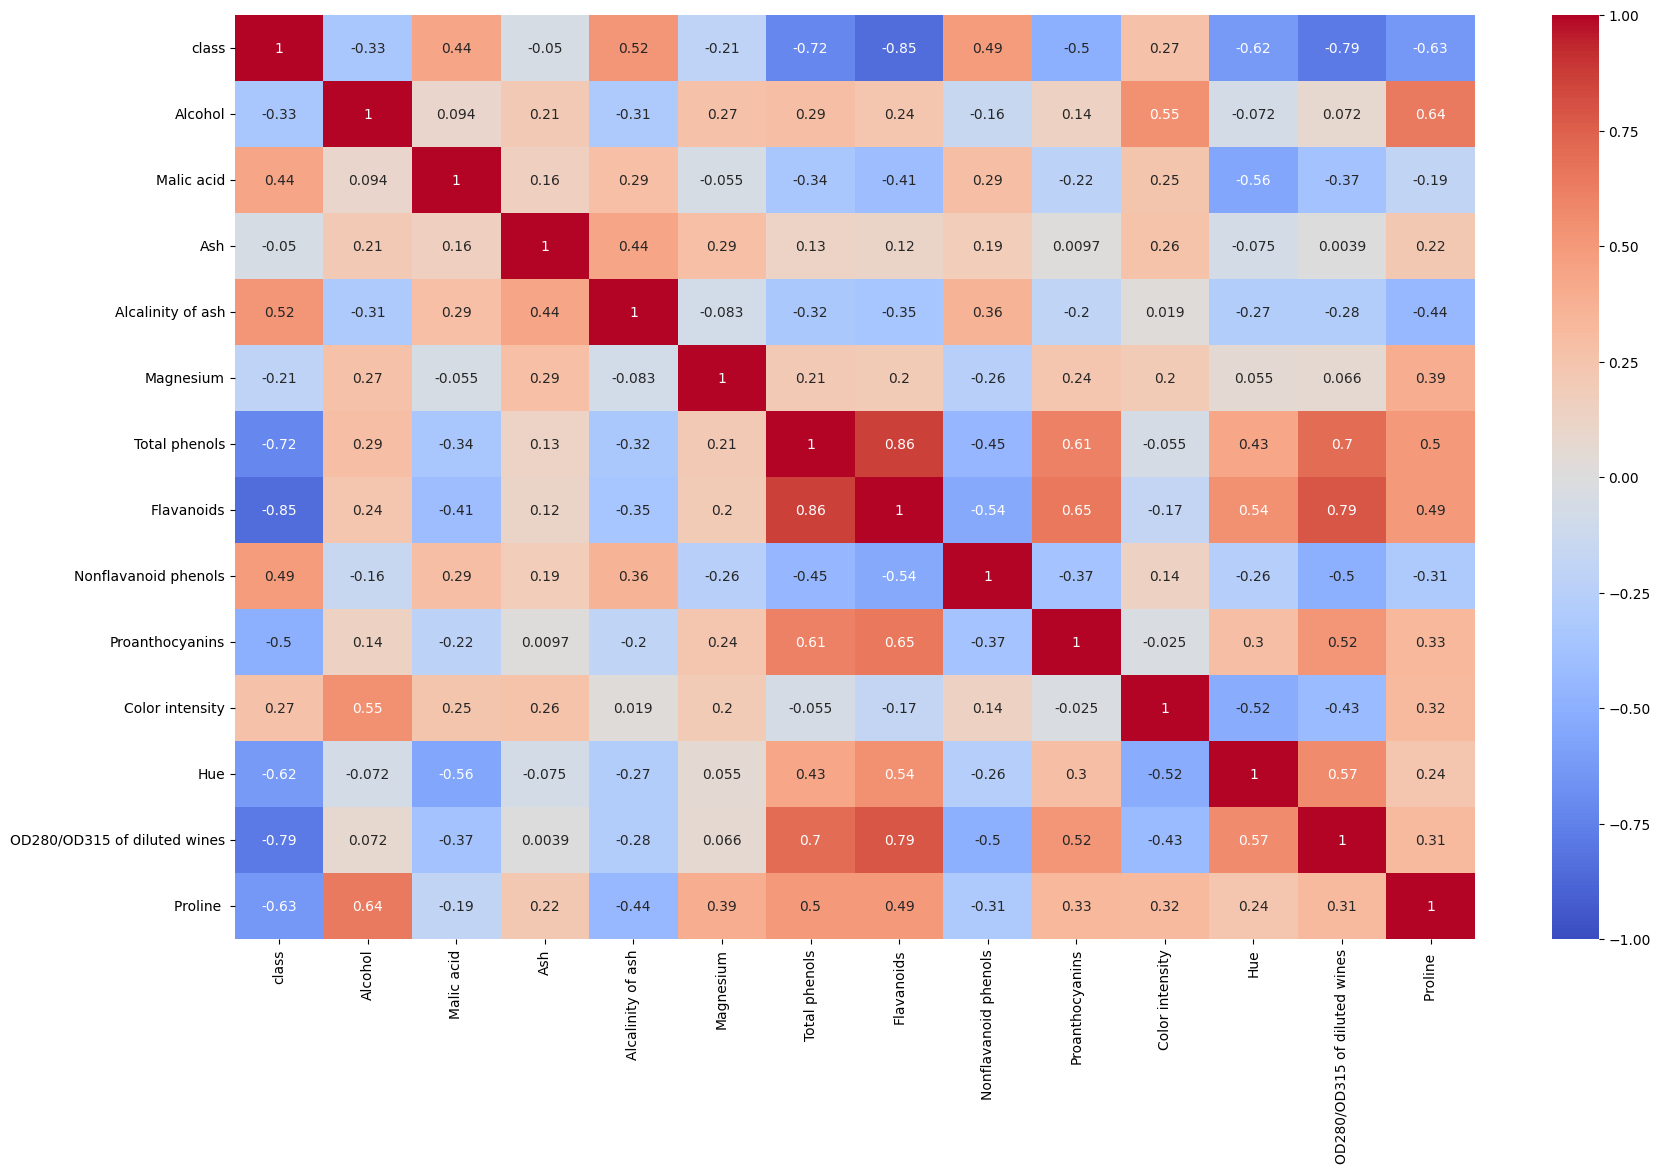

In [82]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(), annot=True, vmin=-1, cmap='coolwarm')
plt.show()

In [56]:
data.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [83]:
#Importing all libraries
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [84]:
#Split Features & Target
X = data.drop("class", axis=1)
y = data["class"]

In [60]:
#Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [85]:
#K-Fold Cross-Validation (KNN base model)
#We test accuracy stability using 10-Fold CV.
knn = KNeighborsClassifier(n_neighbors=5)

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

cv_scores = cross_val_score(knn, X_scaled, y, cv=kfold)

print("CV Scores:", cv_scores) #This gives you more reliable accuracy, not dependent on a single split.
print("Mean Accuracy:", cv_scores.mean())

CV Scores: [0.94444444 1.         1.         0.94444444 1.         0.94444444
 1.         0.94444444 1.         0.94117647]
Mean Accuracy: 0.9718954248366014


In [86]:
#Hyperparameter Tuning using GridSearchCV (Find Best k)
#We test k = 1 to 20:

param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
"""uniform: All k nearest neighbors contribute equally to the classification (majority vote) or 
regression (average) of the new data point."""
"""distance:Neighbors are weighted by the inverse of their distance from the query point.Closer neighbors have a
greater influence on the prediction than farther neighbors."""

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=10,
    scoring='accuracy'
)

grid.fit(X_scaled, y)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best Accuracy: 0.9833333333333332


In [87]:
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_scaled)

print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[59  0  0]
 [ 1 69  1]
 [ 0  0 48]]
              precision    recall  f1-score   support

           1       0.98      1.00      0.99        59
           2       1.00      0.97      0.99        71
           3       0.98      1.00      0.99        48

    accuracy                           0.99       178
   macro avg       0.99      0.99      0.99       178
weighted avg       0.99      0.99      0.99       178



### How to read Confusion Matrix for this case
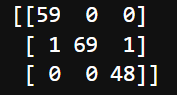
1. We have 3 classes (1, 2, 3)
2. each row is one class, first row is class 1, second row is class 2, third row is class 3
3. For fist row, value 59 is actual correctly predicted class 1, no false prediction for class 2 and 3 (perfect prediction)
4. For second row, value 69 is actual predicted class 2, one false for class 1 and one false for class 3
5. For third row, value 48 is actual correctly predicted class 3, no false for class 1 and 2 (perfect prediction)

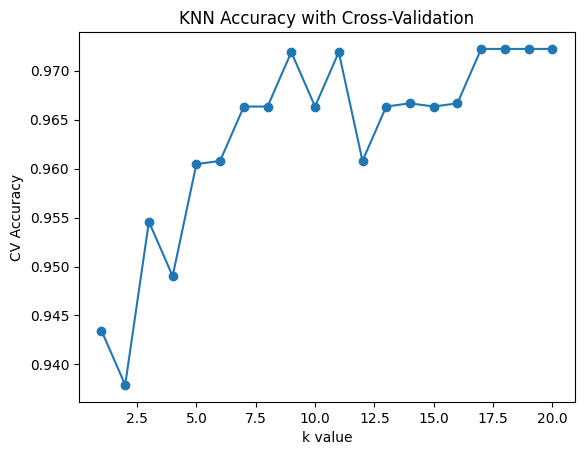

In [88]:
accuracy_scores = []

for k in range(1, 21):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_temp, X_scaled, y, cv=10)
    accuracy_scores.append(scores.mean())

plt.plot(range(1, 21), accuracy_scores, marker='o')
plt.xlabel('k value')
plt.ylabel('CV Accuracy')
plt.title('KNN Accuracy with Cross-Validation')
plt.show()